In [42]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import yfinance as yf

In [2]:
tickers = ["GE"]
stocks = pd.concat([yf.Ticker(i).history(period = "max")["Close"].pct_change().dropna().rename(i) for i in tickers], axis=1, join = 'inner')

In [3]:
#The Goal of this cell is to set the earliest date as a basis, and then count upwards in days
dataframe_length = [i for i in range(len(stocks))]
stocks["ID"] = dataframe_length
#stocks.reindex(dataframe_length)
new = stocks.set_index(stocks["ID"])

In [14]:
train_set, validation_set = train_test_split(new)
train_set

,GE,ID
ID,,
6615,0.000000,6615
13621,0.029508,13621
4650,0.004535,4650
9195,-0.002665,9195
2663,0.009398,2663
...,...,...
3882,-0.004454,3882
8756,0.006622,8756
11538,-0.000248,11538


In [67]:
model = tf.keras.models.Sequential([
    layers.Dense(units = 1, activation = 'linear', input_shape=[1]),
    layers.Dense(units = 64, activation = 'relu'),
    layers.Dense(units = 64, activation = 'relu'),
    layers.Dense(units = 1, activation = 'linear')
])

model.compile(loss=tf.keras.losses.MSE, optimizer='adam')


In [68]:
train = model.fit(train_set["GE"].shift(1).dropna().values, train_set["GE"].values[1:], batch_size = 10, epochs = 100, verbose = 2)

Epoch 1/100
1118/1118 - 1s - loss: 3.0326e-04
Epoch 2/100
1118/1118 - 1s - loss: 3.0057e-04
Epoch 3/100
1118/1118 - 1s - loss: 3.0032e-04
Epoch 4/100
1118/1118 - 2s - loss: 3.0034e-04
Epoch 5/100
1118/1118 - 2s - loss: 3.0171e-04
Epoch 6/100
1118/1118 - 2s - loss: 3.0107e-04
Epoch 7/100
1118/1118 - 1s - loss: 3.0163e-04
Epoch 8/100
1118/1118 - 2s - loss: 3.0048e-04
Epoch 9/100
1118/1118 - 1s - loss: 3.0017e-04
Epoch 10/100
1118/1118 - 2s - loss: 3.0006e-04
Epoch 11/100
1118/1118 - 2s - loss: 3.0097e-04
Epoch 12/100
1118/1118 - 1s - loss: 3.0076e-04
Epoch 13/100
1118/1118 - 1s - loss: 3.0042e-04
Epoch 14/100
1118/1118 - 1s - loss: 3.0089e-04
Epoch 15/100
1118/1118 - 1s - loss: 3.0059e-04
Epoch 16/100
1118/1118 - 1s - loss: 3.0028e-04
Epoch 17/100
1118/1118 - 1s - loss: 3.0048e-04
Epoch 18/100
1118/1118 - 1s - loss: 3.0122e-04
Epoch 19/100
1118/1118 - 1s - loss: 3.0031e-04
Epoch 20/100
1118/1118 - 1s - loss: 3.0036e-04
Epoch 21/100
1118/1118 - 2s - loss: 3.0016e-04
Epoch 22/100
1118/1118

In [60]:
model.save_weights("/Mentorship/weights")
model.weights
model.loss

'mse'

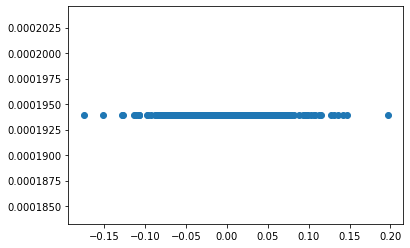

In [69]:
hello = model.predict(train_set["GE"].values)
#plt.scatter(train_set["ID"], train_set["GE"])
plt.scatter(train_set["GE"].values, hello)